In [1]:
# download 3'UTR sequences
!wget http://bartellab.wi.mit.edu/Supplemental%20Material/Agarwal_15_Supp/genemodels_for_training.zip

--2024-07-23 10:31:51--  http://bartellab.wi.mit.edu/Supplemental%20Material/Agarwal_15_Supp/genemodels_for_training.zip
Resolving bartellab.wi.mit.edu (bartellab.wi.mit.edu)... 18.4.1.195
Connecting to bartellab.wi.mit.edu (bartellab.wi.mit.edu)|18.4.1.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4113331 (3.9M) [application/zip]
Saving to: ‘genemodels_for_training.zip’

genemodels_for_trai 100%[===================>]   3.92M   827KB/s    in 5.1s    

2024-07-23 10:31:56 (787 KB/s) - ‘genemodels_for_training.zip’ saved [4113331/4113331]



In [2]:
# unzip the file
!unzip genemodels_for_training.zip -d genemodels_for_training

Archive:  genemodels_for_training.zip
  inflating: genemodels_for_training/human.3utrs.90%  
  inflating: genemodels_for_training/human.5utrs.90%  
  inflating: genemodels_for_training/human.orfs.90%  


In [3]:
# remove the zip file
!rm genemodels_for_training.zip

In [1]:
# load genemodels_for_training/human.3utrs.90% as fasta file - load it into pandas dataframe
import pandas as pd
from Bio import SeqIO

# read the fasta file
fasta_file = "genemodels_for_training/human.3utrs.90%"
fasta_sequences = SeqIO.parse(open(fasta_file),'fasta')

# create a pandas dataframe
data = []
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    data.append([name, sequence])
utr_df = pd.DataFrame(data, columns=['name', 'sequence'])
utr_df

,name,sequence
0,NM_152486,GGTTGCCGGGGGTAGGGGTGGGGCCACACAAATCTCCAGGAGCCAC...
1,NM_015658,GGCAGCCCATCTGGGGGGCCTGTAGGGGCTGCCGGGCTGGTGGCCA...
2,NM_021170,GGCTGTGGCCCTGAGACTGCATCGGAGGCGGCGCCCCGTTCTAGGG...
3,NM_005101,GGGCCTCCACCAGCATCCGAGCAGGATCAAGGGCCGGAAATAAAGG...
4,NM_198576,GCTGGCACCAGAGCCCCGCGCCCGCTGTAATTATTTTCTATTTTTG...
...,...,...
4347,NM_014551,ACTGGCAACCCTGGCTCTGGGGCCGAGTCACCTTGCACAAGGAGGA...
4348,NM_005138,GCCACTGCAGTCTGGGCCCCATCATTAAACGGGCTGCGTTT
4349,NM_001113756,AGCTCCTTTGCCGCG
4350,NM_004377,AGGTTGGAGAAATGCCAGCTGCCCTTTCGTCCCCACACTGTGGAGG...


In [2]:
# drop sequences shorter than 25 nucleotides
utr_df = utr_df[utr_df['sequence'].apply(len) >= 25].reset_index(drop=True)
utr_df

,name,sequence
0,NM_152486,GGTTGCCGGGGGTAGGGGTGGGGCCACACAAATCTCCAGGAGCCAC...
1,NM_015658,GGCAGCCCATCTGGGGGGCCTGTAGGGGCTGCCGGGCTGGTGGCCA...
2,NM_021170,GGCTGTGGCCCTGAGACTGCATCGGAGGCGGCGCCCCGTTCTAGGG...
3,NM_005101,GGGCCTCCACCAGCATCCGAGCAGGATCAAGGGCCGGAAATAAAGG...
4,NM_198576,GCTGGCACCAGAGCCCCGCGCCCGCTGTAATTATTTTCTATTTTTG...
...,...,...
4337,NM_033200,CTGTGTTCTCCCAGCTGCACGTCCTGAGAGGGCCAGGTCGCCGGGA...
4338,NM_014551,ACTGGCAACCCTGGCTCTGGGGCCGAGTCACCTTGCACAAGGAGGA...
4339,NM_005138,GCCACTGCAGTCTGGGCCCCATCATTAAACGGGCTGCGTTT
4340,NM_004377,AGGTTGGAGAAATGCCAGCTGCCCTTTCGTCCCCACACTGTGGAGG...


In [7]:
# download normalized valued for fold changes of miRNA detectable in compendium of 74 sRNA transfection datasets
!wget https://elifesciences.org/download/aHR0cHM6Ly9jZG4uZWxpZmVzY2llbmNlcy5vcmcvYXJ0aWNsZXMvMDUwMDUvZWxpZmUtMDUwMDUtc3VwcDEtdjEueGxzeA--/elife-05005-supp1-v1.xlsx?_hash=H%2F5FE5A2DQOQeW3jFejRMPGZD3R0jSy8yudy4TdUW2c%3D -O elife-05005-supp1-v1.xlsx

--2024-07-23 10:34:51--  https://elifesciences.org/download/aHR0cHM6Ly9jZG4uZWxpZmVzY2llbmNlcy5vcmcvYXJ0aWNsZXMvMDUwMDUvZWxpZmUtMDUwMDUtc3VwcDEtdjEueGxzeA--/elife-05005-supp1-v1.xlsx?_hash=H%2F5FE5A2DQOQeW3jFejRMPGZD3R0jSy8yudy4TdUW2c%3D
Resolving elifesciences.org (elifesciences.org)... 151.101.2.217, 151.101.130.217, 151.101.194.217, ...
Connecting to elifesciences.org (elifesciences.org)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14638393 (14M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘elife-05005-supp1-v1.xlsx’

elife-05005-supp1-v 100%[===================>]  13.96M  17.6MB/s    in 0.8s    

2024-07-23 10:34:52 (17.6 MB/s) - ‘elife-05005-supp1-v1.xlsx’ saved [14638393/14638393]



In [9]:
!pip install openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/96/c2/3dd434b0108730014f1b96fd286040dc3bcb70066346f7e01ec2ac95865f/et_xmlfile-1.1.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 8.9 MB/s eta 0:00:00


In [3]:
# load the excel file as a pandas dataframe
import pandas as pd

# read the excel file
fold_change_df = pd.read_excel("elife-05005-supp1-v1.xlsx", sheet_name="SuppFile1", header=2)
fold_change_df

,RefSeq ID,Used in training,Gene symbol,1595297366,1595297383,1595297389,1595297394,1595297399,1595297422,1595297427,...,GSM210898,GSM210901,GSM210903,GSM210904,GSM210907,GSM210909,GSM210911,GSM210913,GSM37599,GSM37601
0,NM_000014,yes,A2M,0.128236,-0.075038,-0.112888,0.065968,-0.052879,0.149903,-0.006722,...,-0.047468,-0.375208,-0.166545,-0.019968,-0.138571,0.035880,-0.018598,0.252560,0.008253,0.239202
1,NM_000015,no,NAT2,0.036856,0.142391,-0.140294,0.351381,0.127471,-0.002804,-0.201961,...,-0.109986,0.060026,0.034314,-0.051415,-0.039854,0.026718,0.071200,-0.050143,0.051920,0.005786
2,NM_000017,no,ACADS,-0.154820,0.168180,-0.272257,-0.114158,-0.083070,0.030585,0.027530,...,0.007678,0.149879,-0.092242,0.036724,0.068680,0.035942,0.197436,-0.122172,0.051317,0.028000
3,NM_000019,yes,ACAT1,-0.008784,-0.018237,0.007781,-0.147218,-0.338910,0.027150,0.156617,...,0.060880,-0.015912,0.165036,0.150018,0.083146,-0.039774,0.043674,0.104819,0.040821,0.032189
4,NM_000021,no,PSEN1,-0.059516,-0.128415,0.068248,0.080634,0.097183,0.060874,-0.082829,...,-0.078007,-0.027455,-0.144808,-0.085244,0.247627,-0.086543,-0.376869,-0.294755,-0.209954,-0.127491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14181,NM_213658,no,KLRC1,-0.896189,0.041903,-0.233814,-0.823522,0.297476,-0.011278,0.059290,...,0.144704,0.434489,-0.070911,0.248713,0.318272,0.000328,0.019335,-0.124182,0.057770,-0.192902
14182,NM_213662,yes,STAT3,-0.037615,0.144141,0.171455,0.039377,-0.088839,0.183316,0.012250,...,-0.499319,-0.249078,0.001096,0.080500,-0.076303,-0.028110,-0.025229,-0.018243,0.245282,-0.695395
14183,NM_213725,yes,RPLP1,0.054415,0.106129,0.106191,0.094086,0.102203,-0.215663,0.013884,...,-0.373387,0.174631,0.053543,0.018837,0.029867,-0.004849,0.127779,-0.019888,0.200248,0.079445
14184,NM_214710,no,PRSSL1,-0.219154,-0.029206,0.139110,-0.213831,-0.149645,-0.186298,0.042052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fold_change_df = fold_change_df[fold_change_df['Used in training'] == 'yes'].reset_index(drop=True)
fold_change_df

,RefSeq ID,Used in training,Gene symbol,1595297366,1595297383,1595297389,1595297394,1595297399,1595297422,1595297427,...,GSM210898,GSM210901,GSM210903,GSM210904,GSM210907,GSM210909,GSM210911,GSM210913,GSM37599,GSM37601
0,NM_000014,yes,A2M,0.128236,-0.075038,-0.112888,0.065968,-0.052879,0.149903,-0.006722,...,-0.047468,-0.375208,-0.166545,-0.019968,-0.138571,0.035880,-0.018598,0.252560,0.008253,0.239202
1,NM_000019,yes,ACAT1,-0.008784,-0.018237,0.007781,-0.147218,-0.338910,0.027150,0.156617,...,0.060880,-0.015912,0.165036,0.150018,0.083146,-0.039774,0.043674,0.104819,0.040821,0.032189
2,NM_000031,yes,ALAD,-0.009550,-0.057897,0.164866,-0.007923,0.120907,-0.060423,-0.001147,...,-0.341386,-0.116561,-0.105489,-0.000967,0.367778,0.108756,0.054935,0.032338,-0.021103,0.171988
3,NM_000046,yes,ARSB,0.108326,-0.166263,0.191439,0.174221,-0.149274,0.216058,-0.211113,...,0.100208,-0.693672,-0.019464,0.103469,0.003883,-0.038315,-0.081573,-0.305260,0.147904,-0.023082
4,NM_000064,yes,C3,-0.018983,0.049133,-0.019118,-0.115469,0.101950,0.172134,0.019392,...,-0.141715,-0.141561,-0.121640,0.026377,0.652314,-0.055095,0.111793,0.168045,-0.301542,-0.393717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039,NM_213647,yes,FGFR4,0.048888,-0.138194,0.080317,-0.221984,-0.294393,0.158667,0.060927,...,0.120271,0.094327,0.032687,0.075765,-0.227505,0.035865,0.282776,0.082690,-0.206635,-0.015792
4040,NM_213649,yes,SFXN4,-0.774672,-0.004864,0.166531,0.117597,0.044507,0.086933,-0.127225,...,0.190051,0.135251,-0.045038,0.057350,0.084576,0.020172,0.284537,-0.000218,0.115833,0.221812
4041,NM_213651,yes,SLC25A24,0.011870,-0.456756,-0.626732,-0.102992,-0.172466,-0.318413,0.024482,...,-0.883745,-0.107418,0.043842,-0.106745,-1.176525,0.112187,0.210716,-0.151839,0.252256,0.017031
4042,NM_213662,yes,STAT3,-0.037615,0.144141,0.171455,0.039377,-0.088839,0.183316,0.012250,...,-0.499319,-0.249078,0.001096,0.080500,-0.076303,-0.028110,-0.025229,-0.018243,0.245282,-0.695395


In [5]:
# drop columns Used in training and Gene symbol
fold_change_df = fold_change_df.drop(columns=['Used in training', 'Gene symbol'])
fold_change_df

,RefSeq ID,1595297366,1595297383,1595297389,1595297394,1595297399,1595297422,1595297427,1595297432,1595297491,...,GSM210898,GSM210901,GSM210903,GSM210904,GSM210907,GSM210909,GSM210911,GSM210913,GSM37599,GSM37601
0,NM_000014,0.128236,-0.075038,-0.112888,0.065968,-0.052879,0.149903,-0.006722,-0.023860,-0.035229,...,-0.047468,-0.375208,-0.166545,-0.019968,-0.138571,0.035880,-0.018598,0.252560,0.008253,0.239202
1,NM_000019,-0.008784,-0.018237,0.007781,-0.147218,-0.338910,0.027150,0.156617,0.034186,-0.115184,...,0.060880,-0.015912,0.165036,0.150018,0.083146,-0.039774,0.043674,0.104819,0.040821,0.032189
2,NM_000031,-0.009550,-0.057897,0.164866,-0.007923,0.120907,-0.060423,-0.001147,-0.033984,-0.257245,...,-0.341386,-0.116561,-0.105489,-0.000967,0.367778,0.108756,0.054935,0.032338,-0.021103,0.171988
3,NM_000046,0.108326,-0.166263,0.191439,0.174221,-0.149274,0.216058,-0.211113,-0.349894,-0.153598,...,0.100208,-0.693672,-0.019464,0.103469,0.003883,-0.038315,-0.081573,-0.305260,0.147904,-0.023082
4,NM_000064,-0.018983,0.049133,-0.019118,-0.115469,0.101950,0.172134,0.019392,-0.118451,0.013898,...,-0.141715,-0.141561,-0.121640,0.026377,0.652314,-0.055095,0.111793,0.168045,-0.301542,-0.393717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039,NM_213647,0.048888,-0.138194,0.080317,-0.221984,-0.294393,0.158667,0.060927,-0.073400,-0.099516,...,0.120271,0.094327,0.032687,0.075765,-0.227505,0.035865,0.282776,0.082690,-0.206635,-0.015792
4040,NM_213649,-0.774672,-0.004864,0.166531,0.117597,0.044507,0.086933,-0.127225,0.087842,-0.045900,...,0.190051,0.135251,-0.045038,0.057350,0.084576,0.020172,0.284537,-0.000218,0.115833,0.221812
4041,NM_213651,0.011870,-0.456756,-0.626732,-0.102992,-0.172466,-0.318413,0.024482,0.069367,-0.038255,...,-0.883745,-0.107418,0.043842,-0.106745,-1.176525,0.112187,0.210716,-0.151839,0.252256,0.017031
4042,NM_213662,-0.037615,0.144141,0.171455,0.039377,-0.088839,0.183316,0.012250,-0.131087,0.022192,...,-0.499319,-0.249078,0.001096,0.080500,-0.076303,-0.028110,-0.025229,-0.018243,0.245282,-0.695395


In [21]:
# download sRNA sequences
!wget https://static-content.springer.com/esm/art%3A10.1038%2Fnsmb.2115/MediaObjects/41594_2011_BFnsmb2115_MOESM7_ESM.xlsx

--2024-07-23 10:39:26--  https://static-content.springer.com/esm/art%3A10.1038%2Fnsmb.2115/MediaObjects/41594_2011_BFnsmb2115_MOESM7_ESM.xlsx
Resolving static-content.springer.com (static-content.springer.com)... 199.232.16.95
Connecting to static-content.springer.com (static-content.springer.com)|199.232.16.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24875 (24K) [application/octet-stream]
Saving to: ‘41594_2011_BFnsmb2115_MOESM7_ESM.xlsx’

41594_2011_BFnsmb21 100%[===================>]  24.29K  --.-KB/s    in 0.001s  

2024-07-23 10:39:26 (31.1 MB/s) - ‘41594_2011_BFnsmb2115_MOESM7_ESM.xlsx’ saved [24875/24875]



In [6]:
# load the excel file as a pandas dataframe
sRNA_df = pd.read_excel("41594_2011_BFnsmb2115_MOESM7_ESM.xlsx", sheet_name="175 microarrays analyzed", header=0)
sRNA_df

/opt/conda/envs/mirna/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Data set ID,Array ID,Seed + nt 8,7mer-m8 site,sRNA sequence,7mer-m8 SPS (kcal/mol),6mer SPS (kcal/mol),Mean SPS (kcal/mol),TA (log10),TA HeLa (log10),Representative arrays,Motif-enriched representative arrays
0,Dharmacon2006,16012097017936,CACCGUA,UACGGUG,UCACCGUAGAUGCUCUUUC,–9,–7.67,–8.158,2.780,3.958,Yes,NaN
1,Dharmacon2006,16012097017938,CACCGUA,UACGGUG,UCACCGUAGAUGCUCUUUC,–9,–7.67,–8.158,2.780,3.958,NaN,Yes
2,Dharmacon2006,16012097017939,UUGUAGC,GCUACAA,UUUGUAGCCAAAUCCUUUC,–7.57,–4.15,–5.397,3.398,4.563,Yes,Yes
3,Dharmacon2006,16012097017940,UUGUAGC,GCUACAA,UUUGUAGCCAAAUCCUUUC,–7.57,–4.15,–5.397,3.398,4.563,NaN,NaN
4,Dharmacon2006,16012097017951,CACGAUG,CAUCGUG,ACACGAUGGAAUUUGCUGU,–8.18,–5.62,–7.526,2.766,3.996,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
172,GSE8501,GSM210913,ACAUUCA,UGAAUGU,AACAUUCAACGCUGUCGGUGAGU,–5.85,–4.19,–5.394,3.673,4.883,Yes,Yes
173,GSE2075,GSM37599,GGAAUGU,ACAUUCC,UGGAAUGUAAAGAAGUAUGUA,–7.45,–5.66,–6.606,3.539,4.779,Yes,Yes
174,GSE2075,GSM37601,AAGGCAC,GUGCCUU,UAAGGCACGCGGUGAAUGCCA,–9.5,–6.81,–8.401,3.601,4.875,Yes,Yes
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# extract Array ID and sRNA sequence pairs
sRNA_df = sRNA_df[['Array ID', 'sRNA sequence']].dropna().reset_index(drop=True)
sRNA_df

,Array ID,sRNA sequence
0,16012097017936,UCACCGUAGAUGCUCUUUC
1,16012097017938,UCACCGUAGAUGCUCUUUC
2,16012097017939,UUUGUAGCCAAAUCCUUUC
3,16012097017940,UUUGUAGCCAAAUCCUUUC
4,16012097017951,ACACGAUGGAAUUUGCUGU
...,...,...
170,GSM210909,UGUAGUGUUUCCUACUUUAUGGA
171,GSM210911,UCAGUGCAUCACAGAACUUUGU
172,GSM210913,AACAUUCAACGCUGUCGGUGAGU
173,GSM37599,UGGAAUGUAAAGAAGUAUGUA


In [8]:
dataset = []
for index, row in fold_change_df.iterrows():
    # get 3'UTR sequence
    utr_seq_id = row['RefSeq ID']
    # not all of the 3'UTRs are present, because we filtered out the short ones
    if utr_seq_id not in utr_df['name'].values:
        continue
    utr_seq = utr_df[utr_df['name'] == utr_seq_id]['sequence'].values[0]
    
    # iterate over columns in the row
    for col in fold_change_df.columns:
        if col in ['RefSeq ID', 'Gene name']:
            continue
        
        # if fold change is not nan
        if not pd.isna(row[col]):
            sRNA_id = col
            sRNA_seq = sRNA_df[sRNA_df['Array ID'] == sRNA_id]['sRNA sequence'].values[0]
            fold_change = row[col]
            dataset.append([utr_seq_id, sRNA_id, utr_seq, sRNA_seq, fold_change])

# create a pandas dataframe
dataset_df = pd.DataFrame(dataset, columns=['RefSeq ID', 'Array ID', '3UTR sequence', 'sRNA sequence', 'fold change'])
dataset_df

,RefSeq ID,Array ID,3UTR sequence,sRNA sequence,fold change
0,NM_000014,1595297366,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUCGUAGGUCAAAAUACAC,0.128236
1,NM_000014,1595297383,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUCAUCUCCAAUUCGUAGG,-0.075038
2,NM_000014,1595297389,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,AUGCUCUUUCCUCCUGUGC,-0.112888
3,NM_000014,1595297394,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUUUGGAACAGUCUUUCCG,0.065968
4,NM_000014,1595297399,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUUGGAACAGUCUUUCCGA,-0.052879
...,...,...,...,...,...
265229,NM_213725,GSM210909,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UGUAGUGUUUCCUACUUUAUGGA,-0.004849
265230,NM_213725,GSM210911,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UCAGUGCAUCACAGAACUUUGU,0.127779
265231,NM_213725,GSM210913,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,AACAUUCAACGCUGUCGGUGAGU,-0.019888
265232,NM_213725,GSM37599,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UGGAAUGUAAAGAAGUAUGUA,0.200248


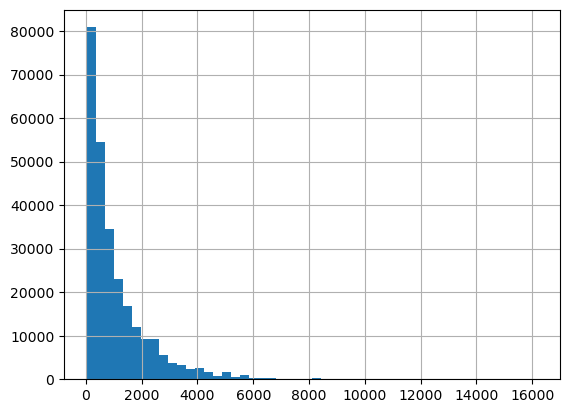

In [9]:
# get histogram of length of 3'UTR sequences
utr_lengths = dataset_df['3UTR sequence'].apply(len)
utr_lengths.hist(bins=50)

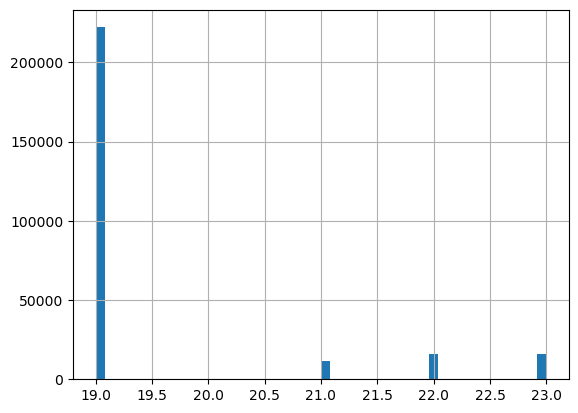

In [10]:
# get histogram of length of sRNA sequences
sRNA_lengths = dataset_df['sRNA sequence'].apply(len)
sRNA_lengths.hist(bins=50)

count    265234.000000
mean         -0.006323
std           0.207846
min          -6.715922
25%          -0.084217
50%           0.007493
75%           0.093974
max           6.964925
Name: fold change, dtype: float64


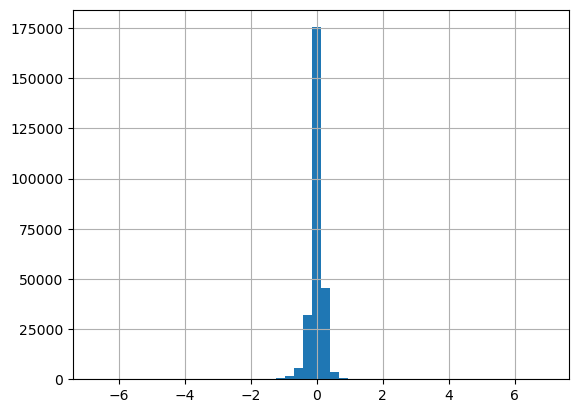

In [11]:
# get histogram of fold changes
dataset_df['fold change'].hist(bins=50)
print(dataset_df['fold change'].describe())

In [12]:
# remove outliers - under 0.1th percentile and over 99.9th percentile
fold_change_01th_percentile = dataset_df['fold change'].quantile(0.001)
fold_change_999th_percentile = dataset_df['fold change'].quantile(0.999)
dataset_filtered_df = dataset_df[(dataset_df['fold change'] >= fold_change_01th_percentile) & (dataset_df['fold change'] <= fold_change_999th_percentile)].reset_index(drop=True)
dataset_filtered_df

,RefSeq ID,Array ID,3UTR sequence,sRNA sequence,fold change
0,NM_000014,1595297366,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUCGUAGGUCAAAAUACAC,0.128236
1,NM_000014,1595297383,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUCAUCUCCAAUUCGUAGG,-0.075038
2,NM_000014,1595297389,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,AUGCUCUUUCCUCCUGUGC,-0.112888
3,NM_000014,1595297394,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUUUGGAACAGUCUUUCCG,0.065968
4,NM_000014,1595297399,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUUGGAACAGUCUUUCCGA,-0.052879
...,...,...,...,...,...
264697,NM_213725,GSM210909,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UGUAGUGUUUCCUACUUUAUGGA,-0.004849
264698,NM_213725,GSM210911,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UCAGUGCAUCACAGAACUUUGU,0.127779
264699,NM_213725,GSM210913,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,AACAUUCAACGCUGUCGGUGAGU,-0.019888
264700,NM_213725,GSM37599,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UGGAAUGUAAAGAAGUAUGUA,0.200248


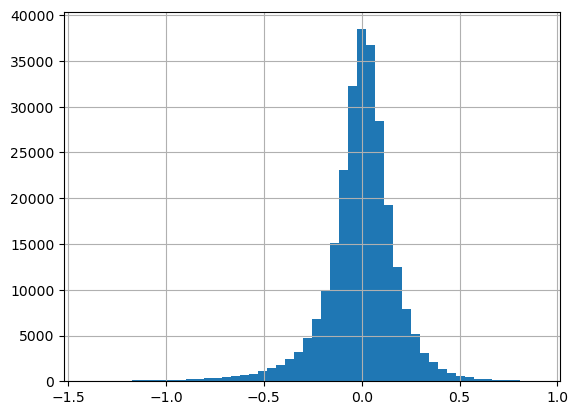

In [13]:
# get histogram of fold changes
dataset_filtered_df['fold change'].hist(bins=50)

In [14]:
# rename columns: 3'UTR sequence -> utr3, sRNA sequence -> miRNA, fold change -> log2fold
dataset_filtered_df = dataset_filtered_df.rename(columns={'3UTR sequence': 'utr3', 'sRNA sequence': 'miRNA', 'fold change': 'log2fold'})
dataset_filtered_df

,RefSeq ID,Array ID,utr3,miRNA,log2fold
0,NM_000014,1595297366,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUCGUAGGUCAAAAUACAC,0.128236
1,NM_000014,1595297383,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUCAUCUCCAAUUCGUAGG,-0.075038
2,NM_000014,1595297389,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,AUGCUCUUUCCUCCUGUGC,-0.112888
3,NM_000014,1595297394,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUUUGGAACAGUCUUUCCG,0.065968
4,NM_000014,1595297399,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,UUUGGAACAGUCUUUCCGA,-0.052879
...,...,...,...,...,...
264697,NM_213725,GSM210909,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UGUAGUGUUUCCUACUUUAUGGA,-0.004849
264698,NM_213725,GSM210911,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UCAGUGCAUCACAGAACUUUGU,0.127779
264699,NM_213725,GSM210913,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,AACAUUCAACGCUGUCGGUGAGU,-0.019888
264700,NM_213725,GSM37599,ACCTCTTTTATAACATGTTCAATAAAAAGCTGAACTTT,UGGAAUGUAAAGAAGUAUGUA,0.200248


In [20]:
# save the dataset as a pickle file
dataset_filtered_df.to_pickle("Agarwal2015_training_dataset_log2fold.pkl")